In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [2]:
style.use('Solarize_Light2')

In [3]:
data = pd.read_csv("./klasifikasi2.csv")
data

,Status Pernikahan,Program Studi,Kelas Siang/Malam,Daerah Asal,Pendidikan Ibu,Pendidikan Ayah,Pekerjaan Ibu,Pekerjaan Ayah,Nilai Ujian Masuk,Pindahan,Berkebutuhan Khusus,Jenis Kelamin,Beasiswa,Usia saat mendaftar,IP Semester 1,Target
0,Belum Menikah,Perbankan,Siang,Pulau Jawa,Dibawah SMA/Sederajat,Dibawah SMA/Sederajat,Lainnya,Lainnya,"52,95",Tidak,Tidak,Perempuan,Tidak,35,"2,36",Lulus Tidak Tepat Waktu
1,Belum Menikah,Teknik Mesin,Siang,Pulau Jawa,Dibawah SMA/Sederajat,Dibawah SMA/Sederajat,Wiraswasta,Lainnya,"66,05",Ya,Tidak,Perempuan,Tidak,19,"2,75",Lulus Tepat Waktu
2,Belum Menikah,Agronomi,Siang,Pulau Jawa,SMA/Sederajat,SMA/Sederajat,Wiraswasta,Lainnya,"63,7",Ya,Tidak,Perempuan,Tidak,20,"2,23",Lulus Tepat Waktu
3,Belum Menikah,Perbankan,Siang,Pulau Jawa,SMA/Sederajat,SMA/Sederajat,Lainnya,Lainnya,"64,75",Ya,Tidak,Perempuan,Tidak,18,"2,46",Lulus Tepat Waktu
4,Belum Menikah,Agronomi,Siang,Pulau Jawa,Lebih dari S1,Lebih dari S1,Pegawai Negri,Lainnya,"63,35",Tidak,Tidak,Perempuan,Tidak,21,"2,43",Lulus Tepat Waktu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Belum Menikah,Perpustakaan,Siang,Pulau Jawa,Dibawah SMA/Sederajat,Dibawah SMA/Sederajat,Lainnya,Lainnya,75,Tidak,Tidak,Perempuan,Tidak,35,"2,80",Lulus Tepat Waktu
96,Belum Menikah,Hubungan Masyarakat,Siang,Pulau Jawa,Lebih dari S1,Lebih dari S1,Pegawai Swasta,Lainnya,65,Ya,Tidak,Perempuan,Tidak,26,"2,60",Lulus Tidak Tepat Waktu
97,Belum Menikah,Jurnalistik,Siang,Pulau Jawa,SMA/Sederajat,SMA/Sederajat,Lainnya,Pegawai Negri,"67,55",Ya,Tidak,Perempuan,Tidak,18,"2,70",Lulus Tepat Waktu
98,Belum Menikah,Agronomi,Siang,Pulau Jawa,Lebih dari S1,Lebih dari S1,Pegawai Swasta,Pegawai Swasta,55,Tidak,Tidak,Perempuan,Tidak,36,"2,14",Lulus Tidak Tepat Waktu


## DATA CLEANING (MENGHAPUS COLUMN DATA YANG TIDAK DIPERLUKAN)

In [4]:
data_copy = data.drop(columns=["Status Pernikahan", "Program Studi", "Usia saat mendaftar", "Pindahan", "Pekerjaan Ayah", "Pekerjaan Ibu", "Daerah Asal", "Kelas Siang/Malam", "Pendidikan Ibu", "Pendidikan Ayah", "Beasiswa", "Berkebutuhan Khusus", "Jenis Kelamin"])
data_copy

,Nilai Ujian Masuk,IP Semester 1,Target
0,"52,95","2,36",Lulus Tidak Tepat Waktu
1,"66,05","2,75",Lulus Tepat Waktu
2,"63,7","2,23",Lulus Tepat Waktu
3,"64,75","2,46",Lulus Tepat Waktu
4,"63,35","2,43",Lulus Tepat Waktu
...,...,...,...
95,75,"2,80",Lulus Tepat Waktu
96,65,"2,60",Lulus Tidak Tepat Waktu
97,"67,55","2,70",Lulus Tepat Waktu
98,55,"2,14",Lulus Tidak Tepat Waktu


## LABEL ENCODING

Pada teknik label LABEL ENCODING setiap kategori pada suatu nilai atau feature akan diurutkan secara alfabet dan direpresentasikan dengan sebuah nilai integer

Teknik LABEL ENCODING pada kasus kita kali ini dapat berfungsi untuk mengubah nilai pada kolom Target dirubah menjadi nilai integer

In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
encode = LabelEncoder()

In [7]:
# encode.fit_transform(data_copy["Target"])

data_copy["Target"] = encode.fit_transform(data_copy["Target"])

encode.classes_

array(['Gagal', 'Lulus Tepat Waktu', 'Lulus Tidak Tepat Waktu'],
      dtype=object)

## PROBLEM

Kita menemukan masalah, seperti yang kita tahu pada programming terutama dalam Python aturan dalam tipe data float menggunakan tanda titik(.) bukan tanda koma(,), sedangkan pada dataset kita menggunakan tanda koma(,)

### SOLVE PROBLEM

In [8]:
nilai_ujian_masuk = []
ip_semester_1 = []

for i in range(len(data_copy)):
    nilai = data_copy["Nilai Ujian Masuk"][i].split(",")
    ip = data_copy["IP Semester 1"][i].split(",")
    
    nilai_ujian_masuk.append(".".join(nilai))
    ip_semester_1.append(".".join(ip))    
    
nilai_ujian_masuk = np.array(nilai_ujian_masuk).reshape(-1, 1)
ip_semester_1 = np.array(ip_semester_1).reshape(-1, 1)

data_copy["IP Semester 1"], data_copy["Nilai Ujian Masuk"] = ip_semester_1, nilai_ujian_masuk


data_copy


,Nilai Ujian Masuk,IP Semester 1,Target
0,52.95,2.36,2
1,66.05,2.75,1
2,63.7,2.23,1
3,64.75,2.46,1
4,63.35,2.43,1
...,...,...,...
95,75,2.80,1
96,65,2.60,2
97,67.55,2.70,1
98,55,2.14,2


In [9]:
X = data_copy[["Nilai Ujian Masuk", "IP Semester 1"]]
y = data_copy["Target"]

## SPLITTING DATASET

Memisahkan antara dataset untuk testing dan dataset untuk training

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(f"Test data = {len(X_test)}")
print(f"Train data = {len(X_train)}")




Test data = 10
Train data = 90


In [12]:
print(encode.classes_)

['Gagal' 'Lulus Tepat Waktu' 'Lulus Tidak Tepat Waktu']


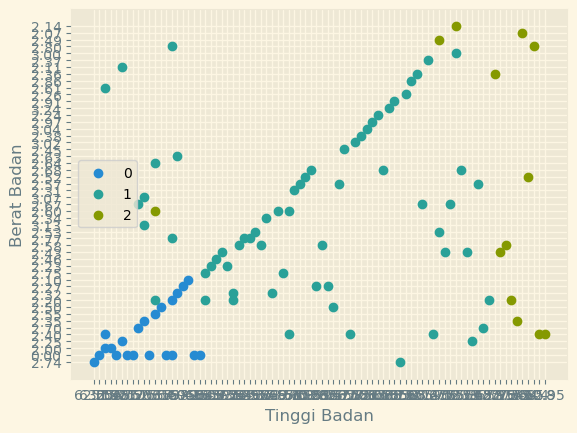

In [13]:
fig, ax = plt.subplots()

for target, d in data_copy.groupby('Target'):
    ax.scatter(d['Nilai Ujian Masuk'], d['IP Semester 1'], label=target)

plt.xlabel("Tinggi Badan")
plt.ylabel("Berat Badan")
plt.legend()
plt.show()

## KNN (K-Nearest Neighbor)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
y_test.to_numpy()
y_pred = model.predict(X_test)
# print(y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
X_anyar = np.array([56.85, 2.68]).reshape(1, -1)

# model.predict(X_test)

## EVALUASI MODEL

In [62]:
from sklearn.metrics import accuracy_score
# print(f"Y test ; {y_test}")
accuracy_score(y_test, y_pred)

0.8